<a href="https://colab.research.google.com/github/damianmtz98/PCD_MCD/blob/main/Practica5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica 2: Analisis inicial de los datos**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_fraud = pd.read_csv('Fraud1.csv')
df_fraud.head(10)

* Tipo de movimiento (TYPE): CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
* Monto de la transacción (AMOUNT):  Monto de la transacción en moneda local.
* Id del cliente inicial (ID_ORIGIN): Cliente que inició la transacción.
* Balance inicial (OLD_BALANCE_ORIG): Saldo inicial antes de la transacción.
* Balance final (NEW_BALANCE_ORIGINAL): Nuevo saldo después de la transacción.
* Id del cliente destino (ID_DEST): cliente que es el destinatario de la transacción.
* Balance inicial del destinatario (OLD_BALANCE_DEST): Destinatario del saldo inicial antes de la transacción. Tenga en cuenta que no hay información para los clientes que comienzan con M (Comerciantes).
* Balance final del destinatario (NEW_BALANCE_DEST): Destinatario del nuevo saldo después de la transacción. Tenga en cuenta que no hay información para los clientes que comienzan con M (Comerciantes).
* ***Si es fraude o no (FRAUD): son las transacciones realizadas por los agentes fraudulentos dentro de la simulación. ***
* Si esta marcado como fraude en el sistema (isFlaggedFraud)

En este conjunto de datos específico, el comportamiento fraudulento de los agentes tiene como objetivo obtener ganancias tomando el control de las cuentas de los clientes e intentar vaciar los fondos transfiriéndolos a otra cuenta y luego cobrándolos del sistema.


FRAUD es nuestra variable objetivo.





In [ ]:
df_fraud.info()

In [ ]:
df_fraud.shape

Contamos con valores flotantes y de tipo objeto y tenemos exactamente 10070 datos y 10 columnas en total.


In [ ]:
df_fraud.describe()


Descripción de los datos

# **Practica 3: Visualización de datos**

Eliminamos datos atipicos

In [ ]:
def remove_outliers(df,col):
    lower_quantile = df[col].quantile(0.25)
    upper_quantile = df[col].quantile(0.75)
    IQR = upper_quantile - lower_quantile
    lower_whisker = lower_quantile - 1.5 * IQR
    upper_whisker = upper_quantile + 1.5 * IQR
    temp = df.loc[(df[col]>lower_whisker)&(df[col]<upper_whisker)]
    return temp[col]

In [ ]:
df_fraud['AMOUNT'] = remove_outliers(df_fraud, 'AMOUNT')
df_fraud['OLD_BALANCE_ORIG'] = remove_outliers(df_fraud, 'OLD_BALANCE_ORIG')
df_fraud['NEW_BALANCE_ORIG'] = remove_outliers(df_fraud, 'NEW_BALANCE_ORIG')
df_fraud['OLD_BALANCE_DEST'] = remove_outliers(df_fraud, 'OLD_BALANCE_DEST')
df_fraud['NEW_BALANCE_DEST'] = remove_outliers(df_fraud, 'NEW_BALANCE_DEST')

Nuestro mapa de calor muestra que las transacciones antiguas y nuevas tanto del remitente como del destinatario están altamente correlacionadas entre sí.

0    1047433
1       1142
Name: FRAUD, dtype: int64


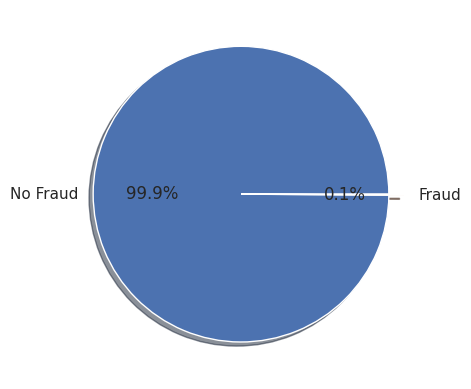

In [ ]:
print(df_fraud.FRAUD.value_counts())

# pie plot for the value count
plt.pie(df_fraud.FRAUD.value_counts(),explode=[0.1, 0],
        labels=['No Fraud', 'Fraud'], shadow=True, autopct='%1.1f%%')
plt.show()

Podemos apreciar la gran diferencia entre los casos de fraude y donde no hay.

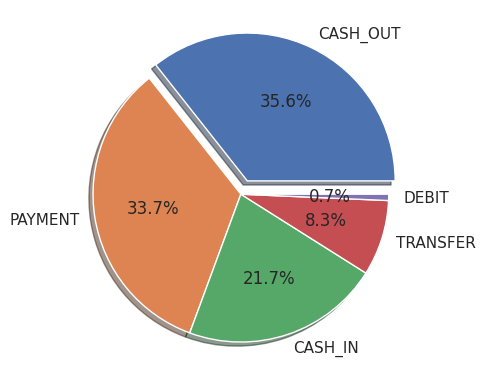

In [ ]:
values = df_fraud['TYPE'].value_counts().values
labels = df_fraud['TYPE'].value_counts().keys()
explode = (0.1,0,0,0,0)

plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.show()

Podemos observar el metodo de retiro de efectivo tiene mas de un tercio de las transacciones. El tipo de debito es la que menos se utilizo en esta base de datos.

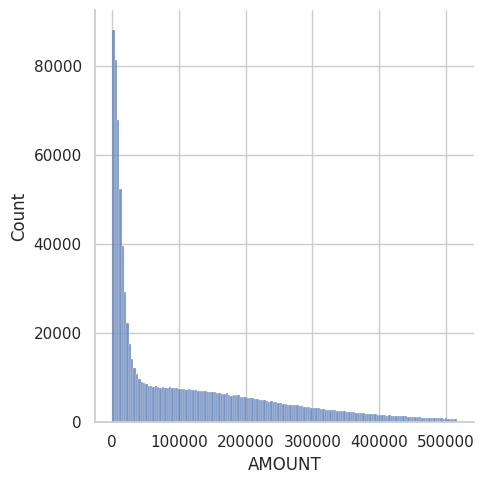

In [ ]:
# diagrama de distribucion de los montos
sns.displot(data=df_fraud, x='AMOUNT')
plt.show()

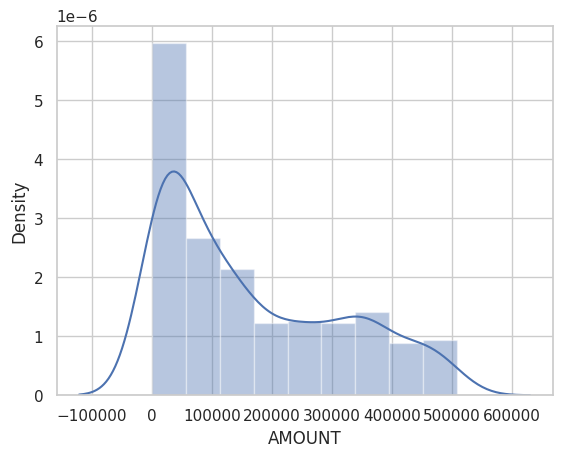

In [ ]:
# diagrama de cantidad de casos de fraude
positive_fraud_case = df_fraud[df_fraud.FRAUD == 1]
sns.distplot(positive_fraud_case['AMOUNT'])
plt.show()

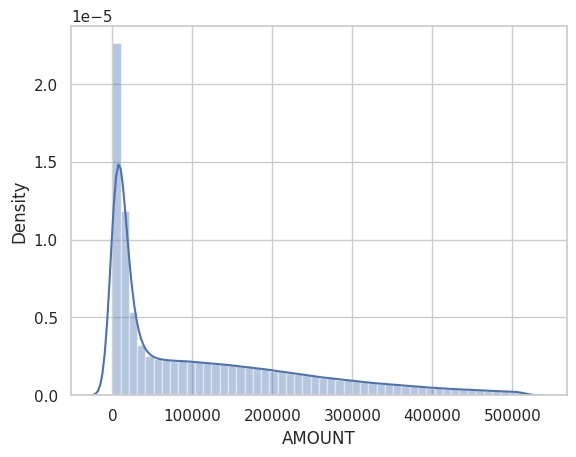

In [ ]:
# diagrama de cantidad de casos sin fraude
non_fraud_case = df_fraud[df_fraud.FRAUD == 0]
sns.distplot(non_fraud_case['AMOUNT'])
plt.show()

# **Práctica 4: Correlación de variables**

In [ ]:
correlation_matrix = df_fraud.corr(method='pearson')


print(correlation_matrix)

                    AMOUNT  OLD_BALANCE_ORIG  NEW_BALANCE_ORIG  \
AMOUNT            1.000000         -0.047346         -0.005441   
OLD_BALANCE_ORIG -0.047346          1.000000          0.587981   
NEW_BALANCE_ORIG -0.005441          0.587981          1.000000   
OLD_BALANCE_DEST  0.390800         -0.098953         -0.087261   
NEW_BALANCE_DEST  0.445865         -0.098442         -0.149799   
FRAUD             0.010787          0.026145         -0.016987   
isFlaggedFraud         NaN               NaN               NaN   

                  OLD_BALANCE_DEST  NEW_BALANCE_DEST     FRAUD  isFlaggedFraud  
AMOUNT                    0.390800          0.445865  0.010787             NaN  
OLD_BALANCE_ORIG         -0.098953         -0.098442  0.026145             NaN  
NEW_BALANCE_ORIG         -0.087261         -0.149799 -0.016987             NaN  
OLD_BALANCE_DEST          1.000000          0.897510 -0.013048             NaN  
NEW_BALANCE_DEST          0.897510          1.000000 -0.005705    

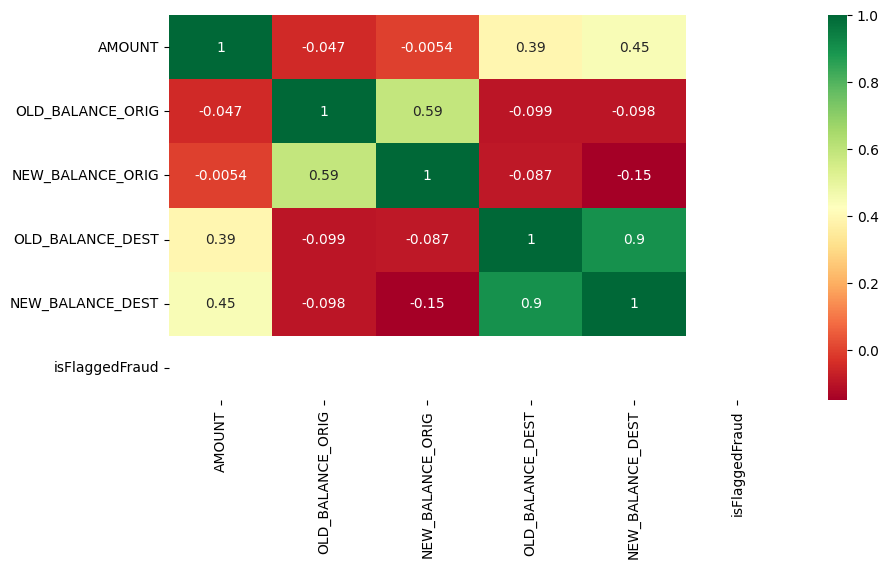

In [ ]:
plt.figure(figsize=[10,5])
sns.heatmap(df_fraud[num_col].corr(), annot=True, cmap='RdYlGn')
plt.show()

* **Correlación entre 'OLD_BALANCE_ORIG' y 'NEW_BALANCE_ORIG':** La correlación positiva de 0.5880 sugiere una fuerte relación entre el saldo inicial en la cuenta de origen ('OLD_BALANCE_ORIG') y el saldo final en la misma cuenta ('NEW_BALANCE_ORIG'). Esto es esperado, ya que se espera que los saldos de las cuentas cambien de acuerdo con las transacciones, pero mantengan una relación positiva.


* **Correlación entre 'AMOUNT' y 'OLD_BALANCE_DEST':** La correlación positiva de 0.3908 sugiere que a medida que el monto de la transacción ('AMOUNT') aumenta, el saldo en la cuenta de destino antes de la transacción ('OLD_BALANCE_DEST') tiende a aumentar. Esto podría indicar que las transacciones más grandes a menudo involucran cuentas de destino con saldos más altos.

* **Correlación entre 'AMOUNT' y 'NEW_BALANCE_DEST':** La correlación positiva de 0.4459 sugiere una relación similar a la anterior. A medida que el monto de la transacción ('AMOUNT') aumenta, el saldo en la cuenta de destino después de la transacción ('NEW_BALANCE_DEST') tiende a aumentar. Esto también sugiere que las transacciones más grandes pueden implicar cuentas de destino con mayores saldos.

* Las correlaciones entre las variables de saldo en cuentas (OLD_BALANCE_ORIG, NEW_BALANCE_ORIG, OLD_BALANCE_DEST, y NEW_BALANCE_DEST) y la variable de fraude (FRAUD) se caracterizan por ser débiles y en su mayoría negativas o cercanas a cero. Esto sugiere que no existe una fuerte asociación entre los saldos en las cuentas y la ocurrencia de fraudes en las transacciones.

# **Práctica 5**


Dividiremos las columnas categorícas y las númericas

In [ ]:
cat_col = [i for i in df_fraud.drop('FRAUD', axis=1).columns if df_fraud[i].dtypes == 'O']
cat_col

['TYPE', 'ID_ORIG', 'ID_DEST']

In [ ]:
num_col = [i for i in df_fraud.drop('FRAUD', axis=1).columns if df_fraud[i].dtypes != 'O']
num_col

['AMOUNT',
 'OLD_BALANCE_ORIG',
 'NEW_BALANCE_ORIG',
 'OLD_BALANCE_DEST',
 'NEW_BALANCE_DEST',
 'isFlaggedFraud']

No contamos con datos duplicados.

In [ ]:
df_fraud.duplicated().any()

False

In [ ]:
df_fraud.isnull().sum()

TYPE                0
AMOUNT              0
ID_ORIG             0
OLD_BALANCE_ORIG    0
NEW_BALANCE_ORIG    0
ID_DEST             0
OLD_BALANCE_DEST    0
NEW_BALANCE_DEST    0
FRAUD               0
isFlaggedFraud      0
dtype: int64

Eliminamos las columnas TYPE, ID_ORIGIN y ID_DEST porque no seran necesarias para llevar a cabo el analisis.

In [ ]:
df_fraud.drop(['ID_ORIG', 'ID_DEST','TYPE'], axis=1, inplace=True)

In [ ]:
df_fraud.head()

,TYPE,AMOUNT,OLD_BALANCE_ORIG,NEW_BALANCE_ORIG,OLD_BALANCE_DEST,NEW_BALANCE_DEST,FRAUD,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0
